In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, GroupShuffleSplit, GroupKFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, roc_auc_score, f1_score, fbeta_score
import time
import gc

In [2]:
wwine = pd.read_csv('data/winequality-white.csv', delimiter = ";") 
rwine = pd.read_csv('data/winequality-red.csv', delimiter = ";")

In [3]:
wy = wwine['quality']
wX = wwine.loc[:, wwine.columns != 'quality'] 
ry = rwine['quality']
rX = rwine.loc[:, rwine.columns != 'quality'] 

In [95]:
r_final_data = []
r_final_models = []
r_maj_class = []
r_final_train = []

for i in range(10,110):
    
    rs = 44*i
    
    rX_train, rX_test, ry_train, ry_test = train_test_split(rX, ry, test_size = 0.2, random_state=rs)
    
    num_ftrs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, num_ftrs)])

    pipe = Pipeline(steps=[('preprocessor', preprocessor)])
    
    rX_train = pipe.fit_transform(rX_train)
    rX_test = pipe.transform(rX_test)
    
    clf = RandomForestClassifier(max_depth = 30, max_features = 10)
    
    clf.fit(rX_train, ry_train)
    
    r_final_data.append((rX_test, ry_test))
    r_final_train.append((rX_train, ry_train))
    
    r_final_models.append(clf)
    r_maj_class.append(max(set(ry_train), key=list(ry_train).count))
    

[CV 3/4; 2/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=32
[CV 3/4; 2/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=32;, score=(train=0.551, test=0.555) total time=   0.4s
[CV 2/4; 3/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64
[CV 2/4; 3/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64;, score=(train=0.552, test=0.552) total time=   0.6s
[CV 1/4; 5/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=16
[CV 1/4; 5/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=16;, score=(train=0.591, test=0.563) total time=   0.5s
[CV 2/4; 7/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=64
[CV 2/4; 7/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=64;, score=(train=0.591, tes

[CV 3/4; 1/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=16
[CV 3/4; 1/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=16;, score=(train=0.552, test=0.554) total time=   0.4s
[CV 1/4; 3/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64
[CV 1/4; 3/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64;, score=(train=0.550, test=0.523) total time=   0.6s
[CV 3/4; 5/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=16
[CV 3/4; 5/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=16;, score=(train=0.593, test=0.570) total time=   0.5s
[CV 4/4; 7/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=64
[CV 4/4; 7/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=64;, score=(train=0.593, tes

[CV 2/4; 1/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=16
[CV 2/4; 1/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=16;, score=(train=0.553, test=0.552) total time=   0.4s
[CV 4/4; 3/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64
[CV 4/4; 3/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64;, score=(train=0.558, test=0.524) total time=   0.5s
[CV 2/4; 5/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=16
[CV 2/4; 5/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=16;, score=(train=0.600, test=0.559) total time=   0.5s
[CV 1/4; 7/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=64
[CV 1/4; 7/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=64;, score=(train=0.586, tes

In [108]:
r_y_tests = []
r_y_tests_pred = []
r_y_tests_prob = []
r_importance_list = []


for i in range(len(r_final_data)):
    
    rX_test, ry_test = r_final_data[i]
    clf = r_final_models[i]
    
    r_y_test_pred = clf.predict(rX_test)
    r_y_test_prob = clf.predict_proba(rX_test)
    
    r_importance = clf.feature_importances_
    
    r_y_tests.append(ry_test)
    r_y_tests_pred.append(r_y_test_pred)
    r_y_tests_prob.append(r_y_test_prob)
    r_importance_list.append(r_importance) 

In [97]:
from statistics import mean, stdev

r_accuracy_scores = [accuracy_score(r_y_tests[i], r_y_tests_pred[i]) for i in range(len(r_y_tests))]

print(f"{mean(r_accuracy_scores)} ± {stdev(r_accuracy_scores)}")

0.6845 ± 0.02255622184541094


In [112]:
r_cms = [confusion_matrix(r_y_tests[i], r_y_tests_pred[i]) for i in range(len(r_y_tests))]

In [98]:
ftr_names = rX.columns
ftr_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [99]:
def ML_pipeline_kfold(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    num_ftrs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, num_ftrs)])
    
    pipe = make_pipeline(preprocessor,RandomForestClassifier(n_estimators =  100,random_state=random_state))

    param_grid = {'randomforestclassifier__max_depth': [3, 5, 10,30,100,300, None],
                  'randomforestclassifier__min_samples_split': [16, 32, 64, 128]}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    feature_names = num_ftrs 
    
    return grid, np.array(feature_names), X_test, y_test

In [100]:
grid, feature_names, X_test, y_test = ML_pipeline_kfold(rX,ry,42,4)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

Fitting 4 folds for each of 28 candidates, totalling 112 fits
0.6528433581504702
0.64375
{'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_split': 16}


In [101]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(320, 11)
(6, 320, 11)


In [102]:
shap_values[0][0]

array([-0.00166511, -0.00046218,  0.00037247, -0.00074205,  0.00095184,
       -0.00106891, -0.00052474, -0.00028781, -0.0003972 , -0.0030747 ,
       -0.00032601])

In [103]:
index = 100 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)

0.007224394057857702


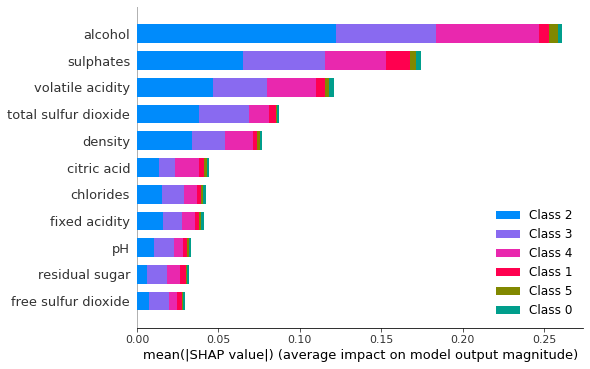

<Figure size 432x288 with 0 Axes>

In [104]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names)
plt.savefig('figures/red_wine_shap.png', dpi=300, format='png')

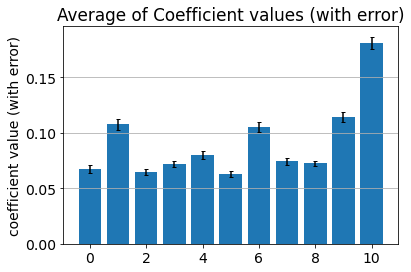

[CV 2/4; 1/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=16
[CV 2/4; 1/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=16;, score=(train=0.619, test=0.613) total time=   0.3s
[CV 4/4; 3/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64
[CV 4/4; 3/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64;, score=(train=0.623, test=0.580) total time=   0.3s
[CV 1/4; 6/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=32
[CV 1/4; 6/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=32;, score=(train=0.687, test=0.616) total time=   0.3s
[CV 3/4; 7/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=64
[CV 3/4; 7/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=64;, score=(train=0.661, tes

[CV 3/4; 2/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=32
[CV 3/4; 2/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=32;, score=(train=0.626, test=0.613) total time=   0.3s
[CV 3/4; 4/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=128
[CV 3/4; 4/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=128;, score=(train=0.612, test=0.613) total time=   0.3s
[CV 4/4; 5/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=16
[CV 4/4; 5/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=16;, score=(train=0.698, test=0.630) total time=   0.3s
[CV 1/4; 8/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=128
[CV 1/4; 8/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=128;, score=(train=0.626,

[CV 1/4; 1/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=16
[CV 1/4; 1/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=16;, score=(train=0.650, test=0.609) total time=   0.3s
[CV 3/4; 3/28] START randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64
[CV 3/4; 3/28] END randomforestclassifier__max_depth=3, randomforestclassifier__min_samples_split=64;, score=(train=0.623, test=0.613) total time=   0.3s
[CV 4/4; 6/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=32
[CV 4/4; 6/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=32;, score=(train=0.695, test=0.630) total time=   0.3s
[CV 4/4; 8/28] START randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=128
[CV 4/4; 8/28] END randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_split=128;, score=(train=0.621, t

In [105]:
r_importance_list_1 = np.array(r_importance_list)
r_mean_coefs = np.mean(r_importance_list_1,axis=0)
r_std_coefs = np.std(r_importance_list_1,axis=0)

plt.bar(np.arange(rX.shape[1]), r_mean_coefs, yerr=r_std_coefs, capsize=2)
# plt.xticks(np.arange(X.shape[1]),X.columns)
plt.ylabel("coefficient value (with error)")
plt.title("Average of Coefficient values (with error)")
plt.savefig('figures/all_coefs_redwine.png', dpi=300, format='png')
plt.grid(axis='y')
plt.show()

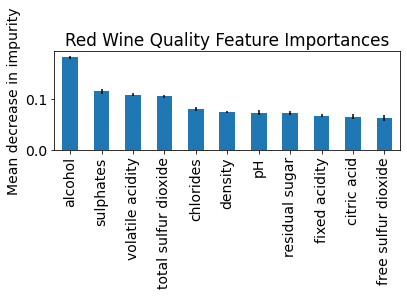

<Figure size 576x432 with 0 Axes>

In [82]:
r_importance = pd.Series(r_mean_coefs, index = feature_names)
r_importance_sort = pd.Series.sort_values(r_importance, ascending = False)

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
r_importance_sort.plot.bar(yerr=r_std_coefs, ax=ax)
ax.set_title("Red Wine Quality Feature Importances")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig('figures/red_wine_feature_importance.png', dpi=300, format='png')
fig.tight_layout()

In [83]:
w_final_data = []
w_final_models = []
w_maj_class = []
w_final_train = []

for i in range(10,110):
    
    rs = 44*i
    
    wX_train, wX_test, wy_train, wy_test = train_test_split(wX, wy, test_size = 0.2, random_state=rs)
    
    num_ftrs = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, num_ftrs)])

    pipe = Pipeline(steps=[('preprocessor', preprocessor)])
    
    wX_train = pipe.fit_transform(wX_train)
    wX_test = pipe.transform(wX_test)
    
    clf = RandomForestClassifier(max_depth = 20, max_features = 3)
    
    clf.fit(wX_train, wy_train)
    
    w_final_data.append((wX_test, wy_test))
    w_final_train.append((wX_train, wy_train))
    
    w_final_models.append(clf)
    w_maj_class.append(max(set(wy_train), key=list(wy_train).count))

In [84]:
w_y_tests = []
w_y_tests_pred = []
w_y_tests_prob = []
w_importance_list = []


for i in range(len(w_final_data)):
    
    wX_test, wy_test = w_final_data[i]
    clf = w_final_models[i]
    
    w_y_test_pred = clf.predict(wX_test)
    w_y_test_prob = clf.predict_proba(wX_test)
    
    w_importance = clf.feature_importances_
    
    w_y_tests.append(wy_test)
    w_y_tests_pred.append(w_y_test_pred)
    w_y_tests_prob.append(w_y_test_prob)
    w_importance_list.append(w_importance) 

In [85]:
w_accuracy_scores = [accuracy_score(w_y_tests[i], w_y_tests_pred[i]) for i in range(len(w_y_tests))]

print(f"{mean(w_accuracy_scores)} ± {stdev(w_accuracy_scores)}")

0.684795918367347 ± 0.014412883343504884


In [89]:
grid, feature_names, X_test, y_test = ML_pipeline_kfold(wX,wy,42,4)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

Fitting 4 folds for each of 28 candidates, totalling 112 fits
0.6265934106022388
0.6316326530612245
{'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_split': 16}


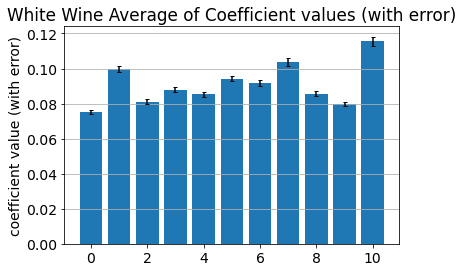

In [86]:
w_importance_list_1 = np.array(w_importance_list)
w_mean_coefs = np.mean(w_importance_list_1,axis=0)
w_std_coefs = np.std(w_importance_list_1,axis=0)

plt.bar(np.arange(wX.shape[1]), w_mean_coefs, yerr=w_std_coefs, capsize=2)
# plt.xticks(np.arange(X.shape[1]),X.columns)
plt.ylabel("coefficient value (with error)")
plt.title("White Wine Average of Coefficient values (with error)")
plt.savefig('figures/all_coefs_whitewine.png', dpi=300, format='png')
plt.grid(axis='y')
plt.show()

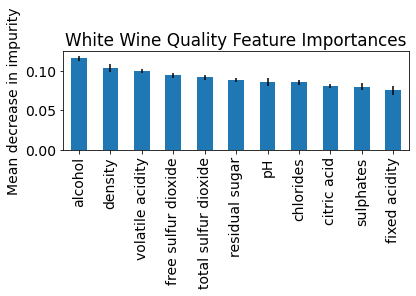

<Figure size 576x432 with 0 Axes>

In [87]:
w_importance = pd.Series(w_mean_coefs, index = feature_names)
w_importance_sort = pd.Series.sort_values(w_importance, ascending = False)

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
w_importance_sort.plot.bar(yerr=r_std_coefs, ax=ax)
ax.set_title("White Wine Quality Feature Importances")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig('figures/white_wine_feature_importance.png', dpi=300, format='png')
fig.tight_layout()

In [90]:
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(980, 11)
(7, 980, 11)


In [91]:
shap_values[0][0]

array([-3.89036270e-05, -9.44432580e-04, -2.17633259e-04,  2.55833325e-04,
       -3.63167159e-04, -1.14250596e-03, -9.34983095e-04,  6.27489648e-04,
       -3.15408697e-04, -2.77509741e-04,  4.26723486e-04])

In [92]:
ndex = 100 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)


0.00383358856559469


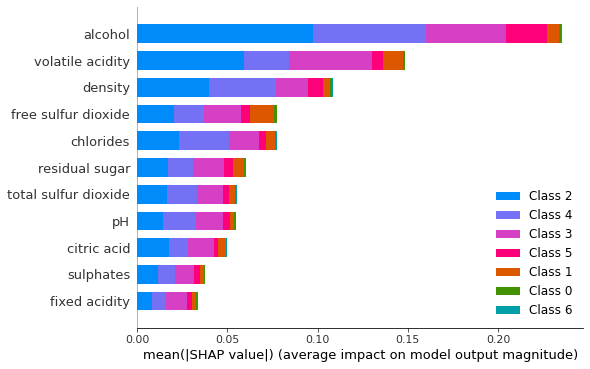

<Figure size 432x288 with 0 Axes>

In [94]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names)
plt.savefig('figures/white_wine_shap.png', dpi=300, format='png')